# TensorFlow CNN - MNIST

This notebook demonstrates an implementation of a convolutional neural network (CNN) on the classic MNIST dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# Dropout Regularization: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Load train and test data

In [ ]:
# Data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"X_test dimensions:  {X_test.shape}")
print(f"y_test dimensions:  {y_test.shape}")

X_train dimensions: (60000, 28, 28)
y_train dimensions: (60000,)
X_test dimensions:  (10000, 28, 28)
y_test dimensions:  (10000,)


In [ ]:
# Get no. unique values from train set
unique_values, counts = np.unique(y_train, return_counts=True)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Get no. unique values from test set
unique_values, counts = np.unique(y_test, return_counts=True)
unique_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 10 different digits
num_classes = 10
# Image dimensions
img_rows, img_cols = 28, 28

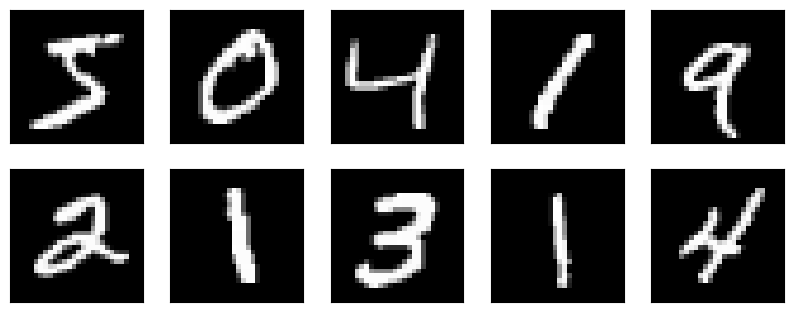

In [ ]:
# Reshape data to view images
X_train_reshape = X_train.reshape(-1,28,28)
X_test_reshape = X_test.reshape(-1,28,28)
# Preview images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i], cmap="gray")
plt.show()

## Transform data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
# Convert data types for train and test data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
# Scale train and test data
X_train /= 255.
X_test /= 255.

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

X_train shape: (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [ ]:
# Convert labels (0 to 9) to binary class matrices with one-hot encoding
# e.g. 9 => 0 0 0 0 0 0 0 0 0 1 and 3 => 0 0 0 1 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Verify one-hot encoding
print(y_train[0:4])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Prepare model for training

In [ ]:
# Initialise the model
model = Sequential()

In [ ]:
num_classes

10

### Convolutional layers

Conv2D: Applies filters of a specified kernel size to the input image, that extract local features. 32 is a common starting point, with a balance between complexity and capturing diverse features. (3, 3) is a common kernel size, for capturing low-level features like edges and corners. ReLU enables models to learn non-linear relationships between features.

### Pooling layers

MaxPooling2D: Reduces image dimensions by taking the maximum value within specified regions, downsampling feature maps. 2x2 is a common starting point with the objective of retaining important features while reducing image sizes.

### Dropout layers

Dropout: Randomly drops a specified proportion of activations during training, to prevent overfitting. 0.5 is a common starting point.

### Dense layers

Flatten: Converts 2D feature maps into a 1D vector for fully connected layers.

Dense: Adds a fully connected layer with a specified number of neurons and a specified activation function.

In [ ]:
# Create CNN to classify images
model.add(Conv2D(
    32,
    kernel_size=(3, 3),
    activation="relu",
    input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

### Compile the CNN

In [ ]:
# Define compile to minimise categorical loss, use ada delta optimized, and optimize to maXimizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

## Train the model

Train the model and test/validate with the test data after each cycle (epoch) through the training data.

In [ ]:
batch_size = 64
epochs = 24

In [ ]:
# Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/24


938/938 [==============================] - 34s 35ms/step - loss: 0.3459 - accuracy: 0.8894 - val_loss: 0.0749 - val_accuracy: 0.9762
Epoch 2/24
938/938 [==============================] - 22s 23ms/step - loss: 0.1255 - accuracy: 0.9611 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 3/24
938/938 [==============================] - 26s 27ms/step - loss: 0.0954 - accuracy: 0.9702 - val_loss: 0.0408 - val_accuracy: 0.9886
Epoch 4/24
938/938 [==============================] - 28s 29ms/step - loss: 0.0814 - accuracy: 0.9743 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 5/24
938/938 [==============================] - 19s 20ms/step - loss: 0.0708 - accuracy: 0.9768 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 6/24
938/938 [==============================] - 20s 21ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 7/24
938/938 [==============================] - 20s 21ms/step - loss: 0.0590 - accuracy: 0.9808 - val_loss: 0.0272 - val_accurac

In [ ]:
# Evaluate model with test data to get scores on "real" data
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss:      {score[0]:.2%}")
print(f"Test accuracy: {score[1]:.2%}")

Test loss:      2.43%
Test accuracy: 99.22%


## Plot results

In [ ]:
import plotly.graph_objects as go

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d", "light": "#fefeff",
    "stone": "#8f8f94", "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3", "yellow": "#e6daaa"
}

In [ ]:
def format_plot(fig):
    """
    Applies custom theme to Plotly figure.
    """
    fig.update_layout(
        plot_bgcolor=palette["dark"], paper_bgcolor=palette["dark"],
        title_font_color=palette["light"],
        xaxis_title_font_color=palette["light"], yaxis_title_font_color=palette["light"],
        xaxis_tickfont_color=palette["stone"], yaxis_tickfont_color=palette["stone"],
        xaxis_gridcolor=palette["grey"], yaxis_gridcolor=palette["grey"],
        xaxis_linecolor=palette["stone"], yaxis_linecolor=palette["stone"],
        title={"x": 0.5},  # Center title
        xaxis={"categoryorder": "category ascending"},  # Set y-axis labels from low to high
        yaxis={
            "categoryorder": "category ascending",  # Set y-axis labels from low to high
            # Add invisible y-ticks to add space between y-axis and y-labels
            "ticks": "outside", "tickcolor": palette["dark"], "ticklen": 5,
        },
        legend_font_color=palette["stone"],
        margin=dict(l=80, r=20, t=40, b=20)
    )
    fig.update_yaxes(
        title_standoff = 5
    )

In [ ]:
# Get per-epoch data from history
epoch_list = list(range(1, len(hist.history["accuracy"]) + 1))  # values for x axis [1, 2, ..., # of epochs]

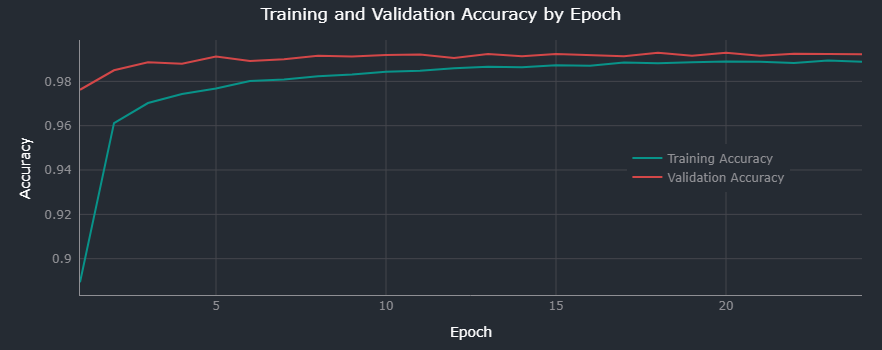

In [ ]:
# Plot data to see relationships between training and validation data
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=epoch_list, y=hist.history["accuracy"],
    mode="lines", name="Training Accuracy", line=dict(color=palette["green"])))
fig.add_trace(go.Scatter(
    x=epoch_list, y=hist.history["val_accuracy"],
    mode="lines", name="Validation Accuracy", line=dict(color=palette["red"])))

fig.update_layout(
    title="Training and Validation Accuracy by Epoch",
    xaxis=dict(title="Epoch"), yaxis=dict(title="Accuracy"),
    height=350, width=600, legend=dict(x=0.7, y=0.5))

format_plot(fig)
fig.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 32)         